In [163]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

%matplotlib inline

mpl.rc("savefig", dpi=200)
data = pd.read_csv('../data/yeast.csv', header=None).values

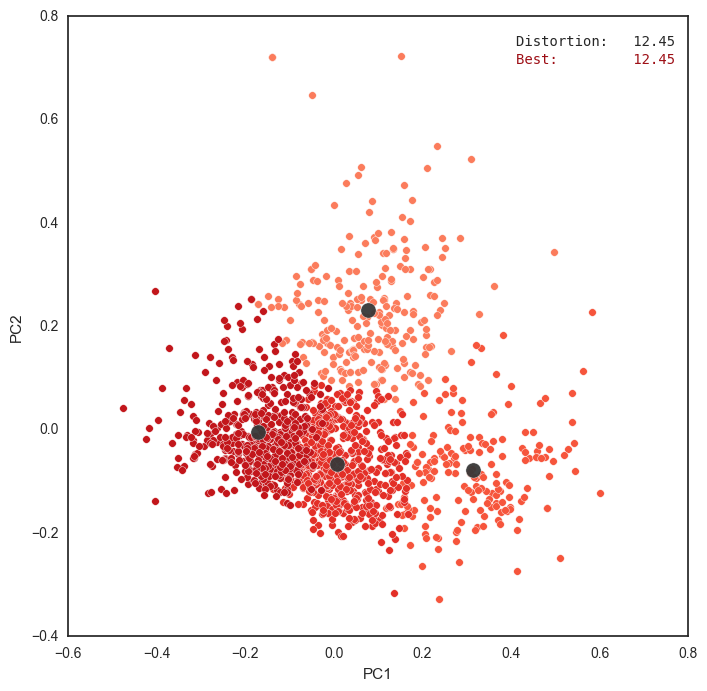

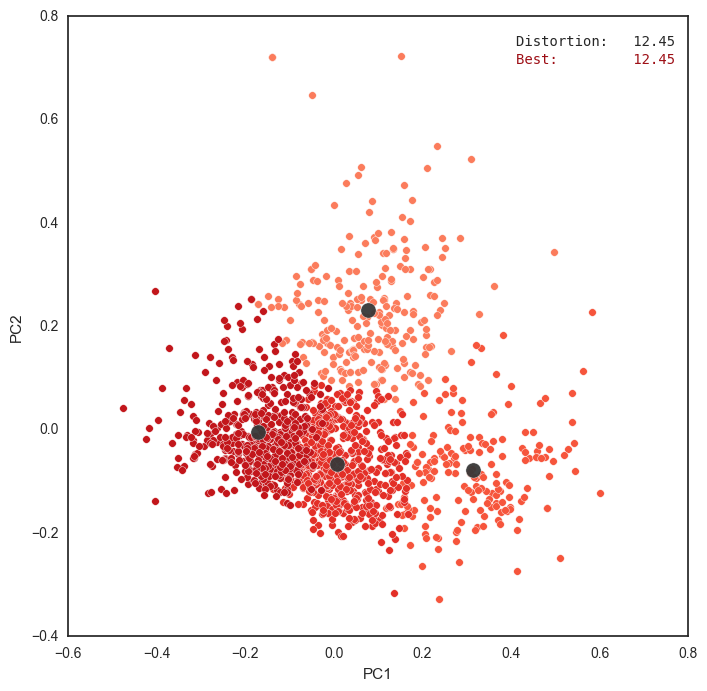

In [288]:
#stock k-means using sklearn
kmeans = KMeans(n_clusters=3,n_init=100,algorithm='full')
kmeans.fit(data)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#distortion code
def distortion(labels,centers,data):
    return np.sum((centers[labels,:]-data)**2)


#plotting code for k-means solutions
def kmeans_plot(labels, centers, data, print_distortion=None, print_best=None):
    K,D = centers.shape
    
    pca = PCA(n_components=2, svd_solver='full')
    pca.fit(data)

    pcs   = pca.transform(data)
    cntrs = pca.transform(centers)
    
    blues = sns.color_palette("Blues", 2*K)
    greys = sns.color_palette("Greys", 16)
    reds = sns.color_palette("Reds", 8)
    
    mycmap=matplotlib.colors.ListedColormap(greys[K:])

    x,y=pcs[:,0],pcs[:,1]

    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    fig = plt.figure(figsize=(8,8),dpi=100)
    ax = fig.add_subplot(111)
    
    for k in range(K):
        ax.scatter(x[labels==k], y[labels==k], s=30, edgecolor='white',c= reds[k+3] )
        
    a=ax.scatter(cntrs[:,0],cntrs[:,1],facecolor=greys[13],edgecolor='white',s=120,alpha=0.95)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    
    if print_distortion!=None:
        distortion_text = "%.2f" % print_distortion
        distortion_text = distortion_text.rjust(7)
        
        ax.text(0.85, 0.96,"Distortion: %s" % distortion_text,
                horizontalalignment='center',
                verticalalignment='center',
                transform = ax.transAxes,family='monospace')
        
        if print_best!=None:
            
                ax.text(0.85, 0.93,"Best:       "+("%.2f"%print_best).rjust(7),
                horizontalalignment='center',
                verticalalignment='center',
                transform = ax.transAxes,family='monospace',color=reds[7])
            
            
    return fig

kmeans_plot(W,A,X,print_distortion=12.445, print_best=12.445)

In [289]:
#basic c-style k-means algorithm

K=4
N,D=data.shape

A = np.zeros((K,D))
W = np.zeros(N,dtype=np.int)
X = data
m = np.zeros(K)

#randomization where we make sure there are points in every cluster
    
def shuffle(x,n):
    for i in range(n-2,-1,-1): #from n-2 to 0
        j= np.random.randint(0,i+1) #from 0<=j<=i
        temp = x[j]
        x[j] = x[i]
        x[i] = temp

best = np.inf
r=0        
for R in range(5):
    for n in range(N):
        W[n] = n%K
        
    shuffle(W,len(W))

    converged = False


    while not converged:
        converged = True
    
        #compute means
        for k in range(K):
            for d in range(D):
                A[k,d] = 0
            m[k]=0
            
        for n in range(N):
            for d in range(D):
                A[W[n],d]+=X[n,d]
            m[ W[n] ] +=1
    
        for k in range(K):
            for d in range(D):
                A[k,d] = A[k,d]/m[k]
                
                
        temp = distortion(W,A,X)
        if temp < best: best = temp
                    
        fig = kmeans_plot(W,A,X,print_distortion=temp,print_best=best);
    
        for b in range(3):
            r=r+1
            fig.savefig('image%d.jpg'%r,dpi=200)
            plt.close(fig)
            
        #assign to closest mean
        for n in range(N):
        
            min_val = np.inf
            min_ind = -1
        
            for k in range(K):
                temp =0
                for d in range(D):
                    temp += (X[n,d]-A[k,d])**2
            
                if temp < min_val:
                    min_val = temp
                    min_ind = k
                
            if min_ind != W[n]:
                W[n] = min_ind
                converged=False
                
        temp = distortion(W,A,X)
        if temp < best: best = temp
        fig = kmeans_plot(W,A,X,print_distortion=temp,print_best=best);
        
        for b in range(3):
            r=r+1
            fig.savefig('image%d.jpg'%r,dpi=200)
            plt.close(fig)

In [380]:
import numpy

def partition(sequence, n_chunks):
    N = len(sequence)
    chunk_size = int(N/n_chunks)
    left_over = N-n_chunks*chunk_size
    allocations = np.array([chunk_size]*n_chunks)
    left_over=([1]*left_over)+([0]*(n_chunks-left_over))
    np.random.shuffle(left_over)
    allocations = left_over+allocations
    indexes = np.cumsum(allocations)
    indexes=np.append(indexes,[0])
    indexes=np.sort(indexes)
    indexes=np.column_stack([indexes[:-1],indexes[1:]])
    
    [stuff for stuff in indexes]
    
    return [sequence[index[0]:index[1]]  for index in indexes]

In [401]:
parti

In [402]:
a.shape

(494, 8)

In [403]:
b.shape

(495, 8)

In [405]:
c.shape

(495, 8)